# PUI midterm

## Part 1: Multiple choice and theoretic questions (20 pts total, 5 pts each question)
Please write your answer after each question

### Question 1. What would the p-value of 0.04 mean for t-test comparing two samples of observations (select all that applies): CD
A) sample averages are at least 4% different

B) sample averages are the same

C) sample averages are different

D) one can reject the null hypothesis that the samples follows the underlying distributions with the same mean at 5% significance level (or with 95% confidence) since p-values is below 0.05

E) one can't reject the null hypothesis that the samples follows the underlying distributions with the same mean at 5% significance level (or 95% confidence) singe p-value does not reach 0.05

F) one can reject the null hypothesis that the samples follows the underlying distributions with the different means at 5% significance level (or 95% confidence)

G) probability that two samples have the same means is 4%

### Question 2. What is true regarding normal and log-normal distributions: D
A) Quantities following log-normal distributions have higher probabilities for outliers compared to normal distributions

B) Outliers significantly different from the mean are more common for the normally distributed variables compared to log normally distributed variables

C) Logarithm of the normally distributed quantity follow a log-normal distribution

D) Logarithm of the log-normally distributed quantity follows a normal distribution

E) Probability density function of the log-normally distributed variable equals to the logarithm of the probability density function of the normally distributed variable

### Question 3. 
### Imagine training a model which considers multiple sattelite images of urban traffic and tries to find groups of typical (repeated with minor deviations) scenarios. How would you classify this problem from Machine Learning perspective?  B

A) Supervised leanring;

B) Unsupervised learning;

C) Semi-supervised learning;

D) Reinforcement learning.

Explain you choice:

### Question 4. 
Please explain why would you need separate training, validation and test samples to learn the model. In which cases you may need all three, including a validation sample?

At first, we need to have a training dataset to train our data with different models. Then, we put a validation sample in those models to select the model with the best prediction score. Finally, we use the test sample to test the model in case the best model we get is overfitted.If we are facing a problem of lacking data in a case of supervised problems, we'd better use all three samples. 

In [162]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
from scipy.stats import norm
from scipy.stats import genextreme as gev
from scipy.stats import pareto 
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Part 2: NYPD data analysis (80 pts)

In this part, you'll use New York Police Department (NYPD) complaints data for 2019 and write code for three following sections (each having own sub-sections): Data cleaning, Exploratory analysis and Hypothesis testing

Data dictionary: https://data.cityofnewyork.us/api/views/qgea-i56i/files/b21ec89f-4d7b-494e-b2e9-f69ae7f4c228?download=true&filename=NYPD_Complaint_Incident_Level_Data_Footnotes.pdf

### read data

In [163]:
data = pd.read_csv('NYPD_data.csv')
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118.0,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113.0,FORGERY,729.0,...,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,12/29/2019,578.0,HARRASSMENT 2,638.0,...,M,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,12/28/2019,126.0,MISCELLANEOUS PENAL LAW,117.0,...,M,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,09/05/2008,101.0,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,NaN,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M


In [164]:
data.shape

(653075, 35)

In [165]:
data.OFNS_DESC.unique()

array(['DANGEROUS WEAPONS', 'FORGERY', 'HARRASSMENT 2',
       'MISCELLANEOUS PENAL LAW', 'MURDER & NON-NEGL. MANSLAUGHTER',
       'BURGLARY', 'DANGEROUS DRUGS', 'PETIT LARCENY',
       'OFF. AGNST PUB ORD SENSBLTY &', 'GRAND LARCENY', 'FELONY ASSAULT',
       'ASSAULT 3 & RELATED OFFENSES', 'ARSON', 'RAPE', 'SEX CRIMES',
       'GRAND LARCENY OF MOTOR VEHICLE', 'ROBBERY',
       'CRIMINAL MISCHIEF & RELATED OF', 'THEFT-FRAUD',
       'VEHICLE AND TRAFFIC LAWS', 'CRIMINAL TRESPASS',
       'OFFENSES INVOLVING FRAUD', 'FRAUDS',
       'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST THE PERSON',
       'ADMINISTRATIVE CODE', 'INTOXICATED & IMPAIRED DRIVING',
       'ESCAPE 3', 'NYS LAWS-UNCLASSIFIED FELONY',
       'POSSESSION OF STOLEN PROPERTY', 'THEFT OF SERVICES',
       'KIDNAPPING & RELATED OFFENSES', 'OTHER OFFENSES RELATED TO THEF',
       'UNAUTHORIZED USE OF A VEHICLE', "BURGLAR'S TOOLS",
       'ENDAN WELFARE INCOMP', 'FRAUDULENT ACCOSTING',
       'AGRICULTURE & MRKTS LA

In [166]:
data.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

The complete data dictionary link is provided above. The focus of this notebook would be on columns - 'CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'PARKS_NM', 'Latitude', 'Longitude'.

The 'CMPLNT_NUM' is a unique id for each complaint, 'CMPLNT_FR_DT' and 'CMPLNT_FR_TM' are date and time of complaint respectively, 'OFNS_DESC' is the type of offence reported, 'BORO_NM' is name of borough where complaint was reported, 'PARKS_NM' is name of park where complaint recorded (if any) and 'Latitude', 'Longitude' are location of complaint.


## Section 1 - Data cleaning tasks (12 pts, 3 pts each part)
1. Drop rows with a) missing/wrong complaint date and time b) missing borough name and c) duplicate complaint number ('CMPLNT_NUM' column)
2. Filter out data where incident occured in a park or greenspace. Next, keep data for 2019 and after.
3. Keep specific crime categories - type 1 crimes defined by FBI: The list is given here https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions
4. Filter by area (drop rows with location outside NYC)

### 1. filter out missing/wrong date and times, missing borough name and duplicate complaints from the data

In [167]:
# code here 
# make sure to convert date column to datetime
data.CMPLNT_FR_DT.dropna()
data.BORO_NM.dropna()
data.CMPLNT_NUM.drop_duplicates ()
data['RPT_DT'] = pd.to_datetime(data['RPT_DT'], errors = 'coerce')
data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'], errors = 'coerce')
data = data[['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'PARKS_NM', 'Latitude', 'Longitude']]
data.shape

(653075, 8)

In [168]:
data.BORO_NM.unique()

array(['MANHATTAN', 'BRONX', 'QUEENS', nan, 'BROOKLYN', 'STATEN ISLAND'],
      dtype=object)

In [169]:
data = data[data.BORO_NM.isin(['MANHATTAN', 'BRONX', 'QUEENS', 'BROOKLYN', 'STATEN ISLAND']) ]


### 2. Remove rows where location is parks or greenspace and keep data for 2019 and after

In [170]:
# parks name is in 'PARKS_NM' column. If a crime has occured outside a parkspace, this value would be NaN
data= data[data.PARKS_NM.isna()]
data.PARKS_NM.unique()

array([nan], dtype=object)

In [171]:
## check the timeline of data
data.CMPLNT_FR_DT.max()

Timestamp('2020-11-20 00:00:00')

In [172]:
data.CMPLNT_FR_DT.min()

Timestamp('1911-12-20 00:00:00')

In [173]:
timeline = data.CMPLNT_FR_DT.max() - data.CMPLNT_FR_DT.min()
timeline

Timedelta('39783 days 00:00:00')

In [174]:
# remove data <2019
data = data.drop(data[(data.CMPLNT_FR_DT < "1/1/2019")].index)
data.shape

(446864, 8)

### 3. keep type 1 crimes as defined by FBI from the data : 
https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions

The crime type is present in the 'OFNS_DESC' column. You just need to keep the following categories: "'ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,'GRAND LARCENY OF MOTOR VEHICLE',
                'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY'"

In [175]:
# code here
data= data[(data['OFNS_DESC']== 'ARSON')|(data['OFNS_DESC']== 'BURGLARY')|(data['OFNS_DESC']== 'FELONY ASSAULT')|
          (data['OFNS_DESC']== 'GRAND LARCENY')|(data['OFNS_DESC']== 'GRAND LARCENY OF MOTOR VEHICLE')|(data['OFNS_DESC']== 'RAPE')|
          (data['OFNS_DESC']== 'MURDER & NON-NEGL. MANSLAUGHTER')|(data['OFNS_DESC']== 'ROBBERY')]
data.shape

(91533, 8)

### 4. keep rows with location within NYC

zip codes file is present in the github 'Data' repository as "ZIPCODE.zip". You can also download the shapefile here: https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u/data?no_mobile=true .

Do a spatial joint to keep only rows within NYC

In [19]:
## zip codes map
# zips = gpd.read_file('Data/ZIPCODE/ZIP_CODE_040114.shp')
zips = gpd.read_file('ZIP/ZIP_CODE_040114.shp')
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


Note: 'ZIPCODE' column has unique codes. The borough name is given in 'COUNTY' column. The counties and boroughs are synonymous in NYC. 'New York' county corresponds to Manhattan, 'Kings' to Brooklyn, 'Richmond' to Staten Island

In [20]:
zips.COUNTY.unique()

array(['Queens', 'Kings', 'Bronx', 'New York', 'Richmond'], dtype=object)

<AxesSubplot:>

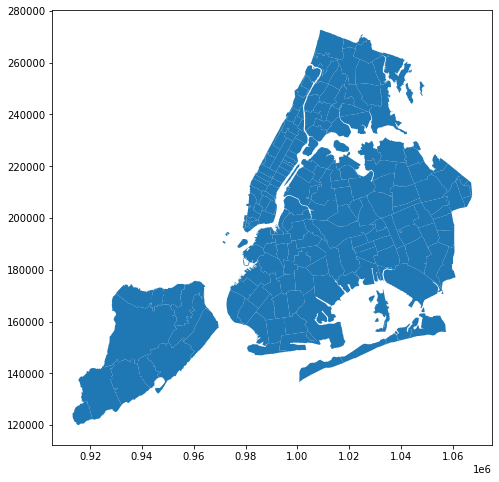

In [21]:
zips.plot(figsize=(8,8))

In [116]:
# remove rows with location outside NYC
zips['COUNTY'] = zips['COUNTY'].replace({'New York':'MANHATTAN','Kings':'BROOKLYN','Richmond':'STATEN ISLAN','Queens': 'QUEENS','Bronx': 'BRONX'})
zips = zips.to_crs(epsg = 4326)
zips['centroid'] = zips.geometry.centroid
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))
data_ny = gpd.sjoin(gdf, zips)


In [117]:
zips.COUNTY.unique()

array(['QUEENS', 'BROOKLYN', 'BRONX', 'MANHATTAN', 'STATEN ISLAN'],
      dtype=object)

In [118]:
data_ny.drop_duplicates(subset=['CMPLNT_NUM'], inplace=True)
data_ny.shape

(91510, 23)

## Section 2 -Exploratory analysis tasks (50 pts, 10 pts each part)

1. Visualize the time series of the total number of type 1 crimes for the whole city per day.
2. Visualize part 1 crimes grouped on a) borough level as a bar plot and b) zip code level as a heatmap normalized by population (per 100,000). Use quantiles scheme colormap.
3. Plot following bar plots: the total number of part 1 crimes by a) month, b) day of week( use weekday names for labels) and c) hour of day.
4. Plot two bar plots: Day of the week and hour of the day timelines for felony vs grand larceny (normalized per 100,000 population, comparing these two types of crime on the same bar plots)
5. Compare the %% decomposition of type 1 crimes by category of crime within different boroughs by plotting pie charts for each borough

### 1. time series plotting

In [119]:
# group total crimes by daily numbers
crimes  = data.groupby(by='CMPLNT_FR_DT').count()[['CMPLNT_NUM']]

<AxesSubplot:xlabel='CMPLNT_FR_DT'>

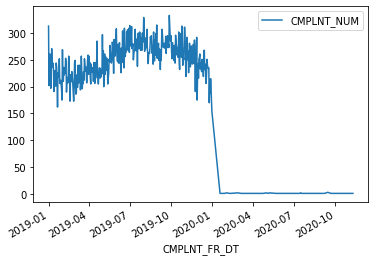

In [120]:
# plot as a time series
crimes.plot()

### 2. plotting on borough and zip code level normalized by population

In [121]:
# group crime numbers by borough and normalize by their population (per 100,000). Population is given in the zips shapefile
crime_norm  = data_ny.groupby(['COUNTY']).agg({'CMPLNT_NUM':'count','POPULATION':'sum'})
crime_norm ['POPULATION'] =  zips[['POPULATION', 'COUNTY']].groupby('COUNTY').sum()
crime_norm ['normalized_crime'] = crime_norm.CMPLNT_NUM/(crime_norm.POPULATION/100000)
crime_norm

,CMPLNT_NUM,POPULATION,normalized_crime
COUNTY,,,
BRONX,18878,1431301.0,1318.939902
BROOKLYN,26257,2548896.0,1030.132261
MANHATTAN,25909,1687421.0,1535.420029
QUEENS,18158,2262768.0,802.468481
STATEN ISLAN,2308,468220.0,492.930674


<AxesSubplot:xlabel='COUNTY'>

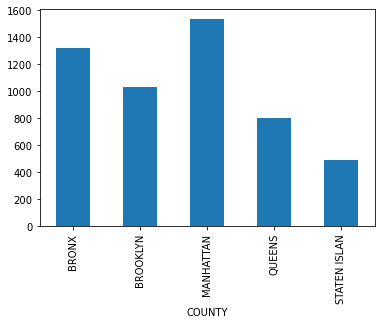

In [122]:
# plot as a bar plot
crime_norm.normalized_crime.plot.bar()

In [123]:
# now group by zip codes, normalize by their population
crime_norm_zip  = data_ny.groupby(['ZIPCODE']).agg({'CMPLNT_NUM':'count','POPULATION':'sum'})
crime_norm_zip['POPULATION'] = crime_norm_zip.POPULATION/crime_norm_zip.CMPLNT_NUM
crime_norm_zip['normalized_crime'] = crime_norm_zip.CMPLNT_NUM/(crime_norm_zip.POPULATION/100000)
crime_norm_zip

,CMPLNT_NUM,POPULATION,normalized_crime
ZIPCODE,,,
00083,68,25.0,272000.000000
10001,1504,22413.0,6710.391291
10002,1221,81305.0,1501.752660
10003,1093,55878.0,1956.047103
10004,95,2187.0,4343.850023
...,...,...,...
11691,774,60267.0,1284.284932
11692,209,18018.0,1159.951160
11693,150,11052.0,1357.220413


<AxesSubplot:>

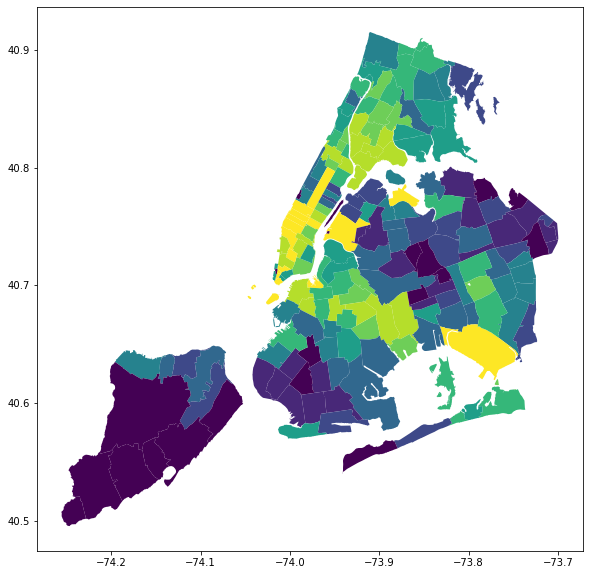

In [124]:
# plot as a heatmap with quantiles color scheme
crime_viz = zips.merge(crime_norm_zip,on='ZIPCODE')
crime_viz.plot(figsize = (10,10), column='normalized_crime', scheme='Quantiles', k=10, legend=False)

#### 3. bar plot of total crimes vs a) months b) day of week and c) hour of day

In [125]:
# code here
data_ny['dayofweek'] = data_ny['CMPLNT_FR_DT'].dt.dayofweek 
data_ny['month'] = data_ny['CMPLNT_FR_DT'].dt.month

 #### a) months

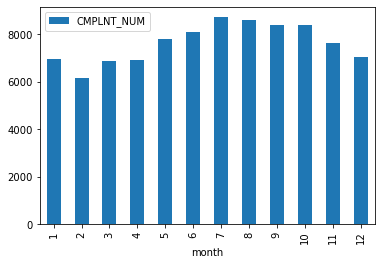

In [126]:
crime_month  = data_ny.groupby(by='month').count()[['CMPLNT_NUM']].plot.bar()

 #### b) day of week

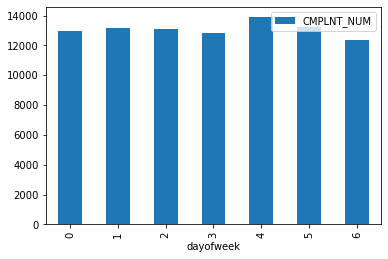

In [127]:
crime_week  = data_ny.groupby(by='dayofweek').count()[['CMPLNT_NUM']].plot.bar()

 #### c) hour of day

<AxesSubplot:xlabel='time'>

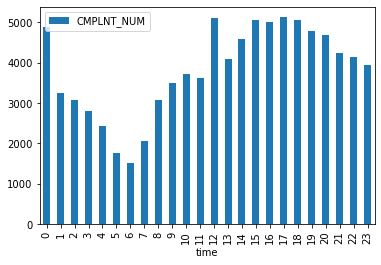

In [128]:
data_ny['CMPLNT_FR_TM'] = pd.to_datetime(data_ny['CMPLNT_FR_TM'])
data_ny['time'] = data_ny['CMPLNT_FR_TM'].dt.hour
crime_hour  = data_ny.groupby(by='time').count()[['CMPLNT_NUM']]
crime_hour.plot.bar()

### 4. Felony assault vs grand larceny by a) day of week b) hour of day

In [129]:
# filter data for above crime types
assault = data_ny[(data_ny['OFNS_DESC'] == 'FELONY ASSAULT')]
larceny = data_ny[(data_ny['OFNS_DESC'] == 'GRAND LARCENY')]
data_ny4 = data_ny[(data_ny['OFNS_DESC'] == 'FELONY ASSAULT')|(data_ny['OFNS_DESC'] == 'GRAND LARCENY')]
data_ny4.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,BORO_NM,PARKS_NM,Latitude,Longitude,geometry,index_right,...,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,centroid,dayofweek,month,time
227,259948697,2019-10-12,2021-10-30 00:01:00,GRAND LARCENY,MANHATTAN,NaN,40.722027,-73.983446,POINT (-73.98345 40.72203),94,...,MANHATTAN,36,061,http://www.usps.com/,0.0,0.0,POINT (-73.97916 40.72653),5,10,0
1116,533911393,2019-11-19,2021-10-30 00:01:00,GRAND LARCENY,MANHATTAN,NaN,40.720813,-73.978136,POINT (-73.97814 40.72081),94,...,MANHATTAN,36,061,http://www.usps.com/,0.0,0.0,POINT (-73.97916 40.72653),1,11,0
1996,405855157,2019-12-31,2021-10-30 18:15:00,FELONY ASSAULT,MANHATTAN,NaN,40.723997,-73.975815,POINT (-73.97582 40.72400),94,...,MANHATTAN,36,061,http://www.usps.com/,0.0,0.0,POINT (-73.97916 40.72653),1,12,18
3465,501022114,2019-12-24,2021-10-30 17:10:00,GRAND LARCENY,MANHATTAN,NaN,40.726521,-73.984639,POINT (-73.98464 40.72652),94,...,MANHATTAN,36,061,http://www.usps.com/,0.0,0.0,POINT (-73.97916 40.72653),1,12,17
3872,598306623,2019-12-31,2021-10-30 20:20:00,FELONY ASSAULT,MANHATTAN,NaN,40.720505,-73.976026,POINT (-73.97603 40.72051),94,...,MANHATTAN,36,061,http://www.usps.com/,0.0,0.0,POINT (-73.97916 40.72653),1,12,20


In [130]:
zips.POPULATION.sum()

8398606.0

In [131]:
# group the numbers and normalize by total city population (per 100,000)
assault['dayofweek'] = assault['CMPLNT_FR_DT'].dt.dayofweek 
larceny['dayofweek'] = larceny['CMPLNT_FR_DT'].dt.dayofweek 
assault_week4  = assault.groupby(by='dayofweek').count()[['CMPLNT_NUM']]
larceny_week4  = larceny.groupby(by='dayofweek').count()[['CMPLNT_NUM']]
assault_week4['normalized_crime_by_week'] = assault_week4.CMPLNT_NUM/(zips.POPULATION.sum()/100000)
larceny_week4['normalized_crime_by_week'] = larceny_week4.CMPLNT_NUM/(zips.POPULATION.sum()/100000)
crime_week4 = pd.DataFrame(columns=['assault_by_week', 'larceny_by_week'], index = assault_week4.index)
crime_week4['assault_by_week'] = assault_week4['normalized_crime_by_week'] 
crime_week4['larceny_by_week'] = larceny_week4['normalized_crime_by_week'] 

In [132]:
crime_week4

,assault_by_week,larceny_by_week
dayofweek,,
0,32.624462,70.511702
1,31.933871,71.404707
2,32.314887,71.547588
3,31.600482,69.452002
4,33.160265,76.262656
5,40.280494,64.105877
6,39.113634,58.140601


<AxesSubplot:xlabel='dayofweek'>

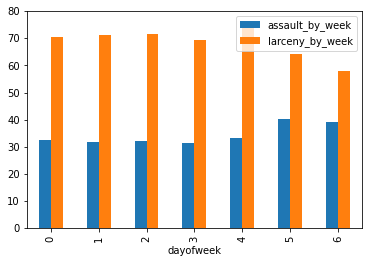

In [133]:
# plot two bar plots: one for day of week and other for hour of day
# each plot should have comparison of the two type of crime numbers (normalized) by weekday and hour respectively
crime_week4[['assault_by_week', 'larceny_by_week']].plot.bar()

<AxesSubplot:xlabel='time'>

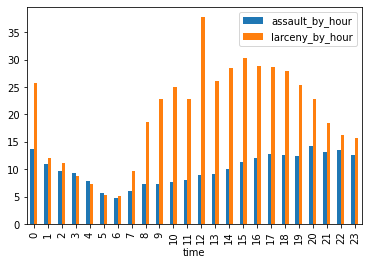

In [134]:
assault_hour = assault.groupby(by='time').count()[['CMPLNT_NUM']]
larceny_hour = larceny.groupby(by='time').count()[['CMPLNT_NUM']]
crime_hour4 = pd.DataFrame(columns=['assault_by_hour', 'larceny_by_hour'], index = assault_hour.index)
crime_hour4['assault_by_hour'] = assault_hour['CMPLNT_NUM']/(zips.POPULATION.sum()/100000)
crime_hour4['larceny_by_hour'] = larceny_hour['CMPLNT_NUM'] /(zips.POPULATION.sum()/100000)
crime_hour4.plot.bar()

### 5. comparing the %% decomposition of crime within different boroughs

### % distribution of crime types by borough in pie charts 

for matplotlib pie charts documentation: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

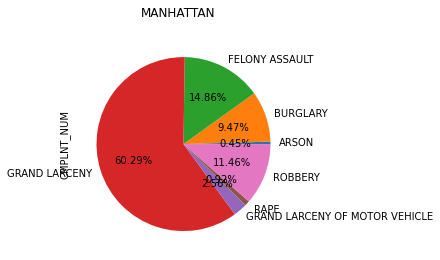

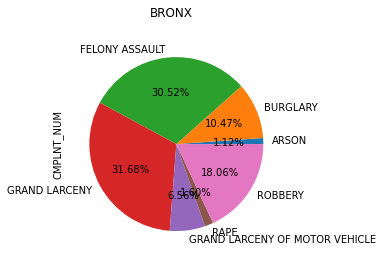

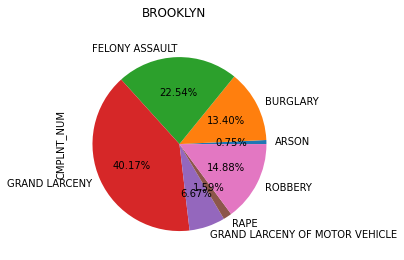

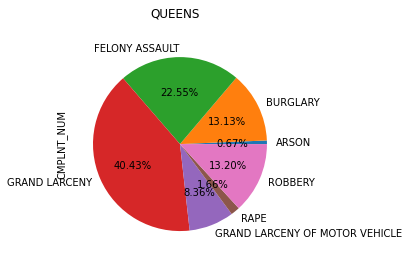

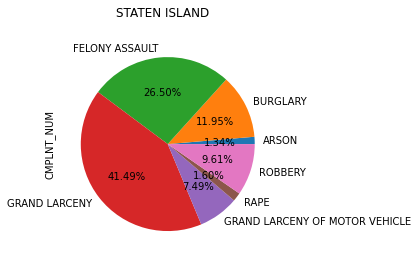

In [135]:
# plot 5 pie charts for each borough depicting % of each crime type within type 1 crimes
for boro in data_ny.BORO_NM.unique():
    df = data_ny[data_ny['BORO_NM']== boro]
    pie = df.groupby(by='OFNS_DESC').count()[['CMPLNT_NUM']].plot.pie(title = boro, subplots=1, autopct='%.2f%%',legend = False)

# complete this code here

## Section 3 - Hypothesis testing tasks (18 pts, 9 pts for each part)

1. Plot the distribution (density plot) of daily number of total type 1 crimes for 2019.
Test the hypothesis if the distribution follows normal distribution.

2. Plot the distributions (density plots) of daily number of total type 1 crimes for weekdays and weekends (normalized by population) and perform a) the t-test for the hypothesis that the average daily crime over weekdays and weekends is the same, b) the KS-test for the hypothesis that the weekday and weekend daily crime numbers follow the same distribution. Can you reject either hypothesis at the 10% significance level? 

### 1. plotting distributions and normality test

In [136]:
#introduce a custom function performing distribution analysis
def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    #x - array of observations
    #log_scale - analyze distribution of log(x) if True
    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    #bins - how many bins to use for binning the data
    #vis_means - show mean and std lines if True
    #vis_curve - show interpolated distribution curve over the histogram bars if True
    #print_outputs - print mean, std and percentiles
    
    if log_scale: 
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale 
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation 
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))
        
    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve, 
        bins=bins,color = 'darkblue', 
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
    
    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
        
    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 
    #(to make sure the fitted distribution would not affect it)
    
    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters
    
    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')
    
    plt.xlabel(xlabel) #add x label 
    plt.ylim(ylim) #restore the y-range of original distribution density values 
    plt.show()
    return pars

In [137]:
# group type 1 crime numbers per day for 2019
data2019 = data_ny[data_ny['CMPLNT_FR_DT']< '2020-01-01']
crimes  = data2019.groupby(by='CMPLNT_FR_DT').count()[['CMPLNT_NUM']]

Mean = 250.59
Standard deviation = 32.84
1 percentile = 172.64
5 percentile = 197.20
25 percentile = 227.00
50 percentile = 251.00
75 percentile = 275.00
95 percentile = 302.00
99 percentile = 313.36


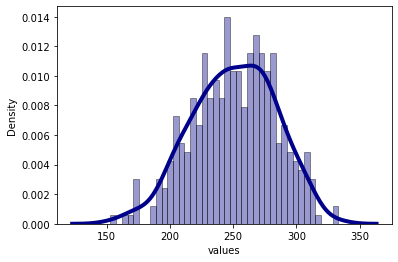

In [138]:
# plot the distribution (density plot)
distribution_analysis(crimes.CMPLNT_NUM, bins=40, vis_means = False)

In [139]:
# normality test
stats.kstest(crimes.CMPLNT_NUM,'norm',args=(crimes.CMPLNT_NUM.mean(),crimes.CMPLNT_NUM.std()))

KstestResult(statistic=0.047581917791931994, pvalue=0.3687953478777197)

### 2. weekdays vs weekend distribution

In [140]:
data_ny['dayofweek'].unique()

array([4, 5, 1, 3, 0, 6, 2], dtype=int64)

In [181]:
# create dataframes for weekdays and weekends
weekdays = data2019[data2019['dayofweek'].isin([4, 1, 3, 0, 2])]
weekends = data2019[data2019['dayofweek'].isin([5, 6])]

In [182]:
# group daily numbers for weekdays and weekends
weekdays_daily = weekdays.groupby(by='CMPLNT_FR_DT').count()[['CMPLNT_NUM']]
weekends_daily = weekends.groupby(by='CMPLNT_FR_DT').count()[['CMPLNT_NUM']]

In [183]:
weekdays_daily = weekdays_daily/(zips.POPULATION.sum()/100000)
weekends_daily = weekends_daily/(zips.POPULATION.sum()/100000)

In [185]:
weekends_daily

,CMPLNT_NUM
CMPLNT_FR_DT,
2019-01-05,2.738550
2019-01-06,2.345627
2019-01-12,2.762363
2019-01-13,2.274187
2019-01-19,2.821897
...,...
2019-12-15,2.762363
2019-12-21,2.857617
2019-12-22,2.809990


Mean = 3.01
Standard deviation = 0.40
1 percentile = 2.04
5 percentile = 2.37
25 percentile = 2.74
50 percentile = 3.01
75 percentile = 3.30
95 percentile = 3.60
99 percentile = 3.74


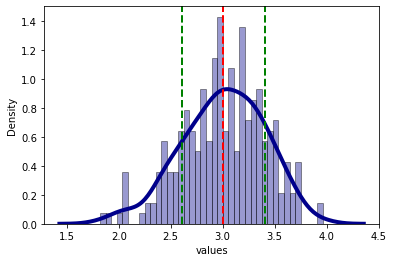

In [153]:
# plot distribution (density plot)
distribution_analysis(weekdays_daily.CMPLNT_NUM , bins=40)

Mean = 2.93
Standard deviation = 0.37
1 percentile = 2.26
5 percentile = 2.35
25 percentile = 2.66
50 percentile = 2.89
75 percentile = 3.22
95 percentile = 3.56
99 percentile = 3.67


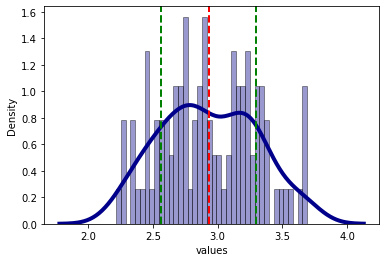

In [155]:
distribution_analysis(weekends_daily.CMPLNT_NUM , bins=40)

In [176]:
weekdays_daily = np.array(weekdays_daily).flatten() 
weekends_daily = np.array(weekends_daily).flatten() 

In [179]:
weekdays_daily 

array([3.72680895, 2.40516105, 3.0838451 , 3.10765858, 2.66710928,
       3.22672596, 2.94096425, 2.82189687, 2.90524404, 2.59566885,
       2.73854971, 2.72664297, 2.39325431, 2.90524404, 1.92889153,
       2.67901602, 2.69092276, 2.59566885, 3.00049794, 2.52422843,
       2.41706778, 2.33372062, 2.08367912, 3.20291248, 2.80999013,
       2.6432958 , 2.71473623, 2.67901602, 3.01240468, 2.53613516,
       2.58376211, 2.46469474, 2.65520254, 3.06003163, 2.05986565,
       2.63138907, 2.48850821, 2.53613516, 2.71473623, 2.27418693,
       2.05986565, 2.40516105, 2.91715077, 2.96477773, 2.25037345,
       2.6432958 , 2.36944083, 2.36944083, 2.85761709, 2.85761709,
       2.61948233, 2.30990714, 2.44088126, 3.06003163, 2.46469474,
       2.452788  , 2.71473623, 2.52422843, 3.00049794, 2.82189687,
       2.72664297, 2.46469474, 2.75045644, 2.97668446, 3.06003163,
       2.76236318, 2.91715077, 2.58376211, 2.44088126, 2.7980834 ,
       2.77426992, 2.7980834 , 2.50041495, 2.91715077, 2.91715

In [177]:
# t-test
t = stats.ttest_ind(weekdays_daily,weekends_daily)
if t.pvalue < 0.1:
    print('reject')
else:
     print('keep')    

reject


In [178]:
# k-s test
k_s = stats.ks_2samp(weekdays_daily,weekends_daily)
if k_s.pvalue < 0.1:
    print('reject')
else:
     print('keep')

reject
